In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

**Load pre-shuffled MNIST data into train and test sets** Note that MNIST is a database of handwritten digits with 28 x 28 pixels

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


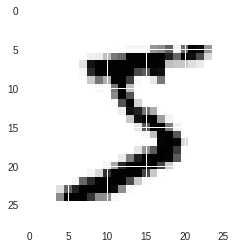

In [45]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Here we are reshaping the x_train and x_test arrays from (num_samples,28,28) to (num_samples,28,28,1)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Now we take a copy of the array, cast it to a float data type.Then we divide every number in the array by 255 to bring its values between 0 and 1. This is a form of regularization



In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (7, 7), input_shape = (28, 28, 1), padding='same'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(10, 14))


model.add(Flatten())
model.add(Activation('softmax'))

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_171 (Conv2D)          (None, 28, 28, 32)        1600      
_________________________________________________________________
conv2d_172 (Conv2D)          (None, 28, 28, 10)        330       
_________________________________________________________________
activation_176 (Activation)  (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
dropout_165 (Dropout)        (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_173 (Conv2D)          (None, 1, 1, 10)          19610     
_________________________________________________________________
flatten_10 (Flatten)         (None, 10)                0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [67]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 27s 450us/step - loss: 0.2219 - acc: 0.9326
Epoch 2/10
50048/60000 [========================>.....] - ETA: 3s - loss: 0.0866 - acc: 0.9730

60000/60000 [==============================] - 21s 356us/step - loss: 0.0855 - acc: 0.9736
Epoch 3/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.0679 - acc: 0.9788
Epoch 4/10
12320/60000 [=====>........................] - ETA: 17s - loss: 0.0613 - acc: 0.9817

60000/60000 [==============================] - 21s 358us/step - loss: 0.0606 - acc: 0.9808
Epoch 5/10
60000/60000 [==============================] - 21s 358us/step - loss: 0.0521 - acc: 0.9831
Epoch 6/10
  960/60000 [..............................] - ETA: 21s - loss: 0.0480 - acc: 0.9823

60000/60000 [==============================] - 21s 356us/step - loss: 0.0485 - acc: 0.9844
Epoch 7/10
57216/60000 [===========================>..] - ETA: 0s - loss: 0.0452 - acc: 0.9850

60000/60000 [==============================] - 21s 355us/step - loss: 0.0455 - acc: 0.9850
Epoch 8/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.0436 - acc: 0.9856
Epoch 9/10
14432/60000 [======>.......................] - ETA: 16s - loss: 0.0410 - acc: 0.9866

60000/60000 [==============================] - 21s 357us/step - loss: 0.0414 - acc: 0.9866
Epoch 10/10
60000/60000 [==============================] - 21s 354us/step - loss: 0.0398 - acc: 0.9869


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [69]:
print(score)

[0.04214547336179821, 0.9872]


In [71]:
print(y_pred[:9])
print(y_test[:9])

[[2.7926730e-13 5.7275598e-13 8.8453049e-09 9.7241355e-06 6.0065078e-17
  1.8987968e-10 5.9120880e-21 9.9999022e-01 6.0589270e-11 1.1956972e-08]
 [2.0046104e-10 1.5443700e-06 9.9999738e-01 8.3188700e-10 1.1122527e-11
  1.7545030e-13 1.1130111e-06 1.5026004e-15 3.7898154e-10 6.0465760e-13]
 [1.6700783e-08 9.9932313e-01 6.3504602e-05 1.3937070e-06 2.4221576e-04
  3.1259399e-06 8.4575704e-06 1.6174532e-04 1.9580578e-04 5.8446022e-07]
 [9.9999464e-01 4.5818589e-11 1.9922923e-07 4.7457527e-10 2.0568147e-09
  4.7698121e-09 4.3964733e-06 7.7745504e-08 3.6308625e-09 5.5731846e-07]
 [4.4173928e-10 9.0069658e-09 8.6292982e-09 1.2207805e-08 9.9986756e-01
  2.3142925e-09 8.3033336e-10 3.5648617e-07 3.4523282e-08 1.3198075e-04]
 [1.7259453e-09 9.9945015e-01 9.8190249e-06 8.7633403e-08 3.7725378e-05
  4.4333934e-08 2.5756935e-07 4.3123256e-04 7.0518479e-05 7.5054956e-08]
 [3.1914756e-16 4.9133146e-08 3.0211262e-09 4.2734847e-09 9.9785042e-01
  5.8015416e-06 1.9357094e-12 4.8237518e-05 1.1795915e-03 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

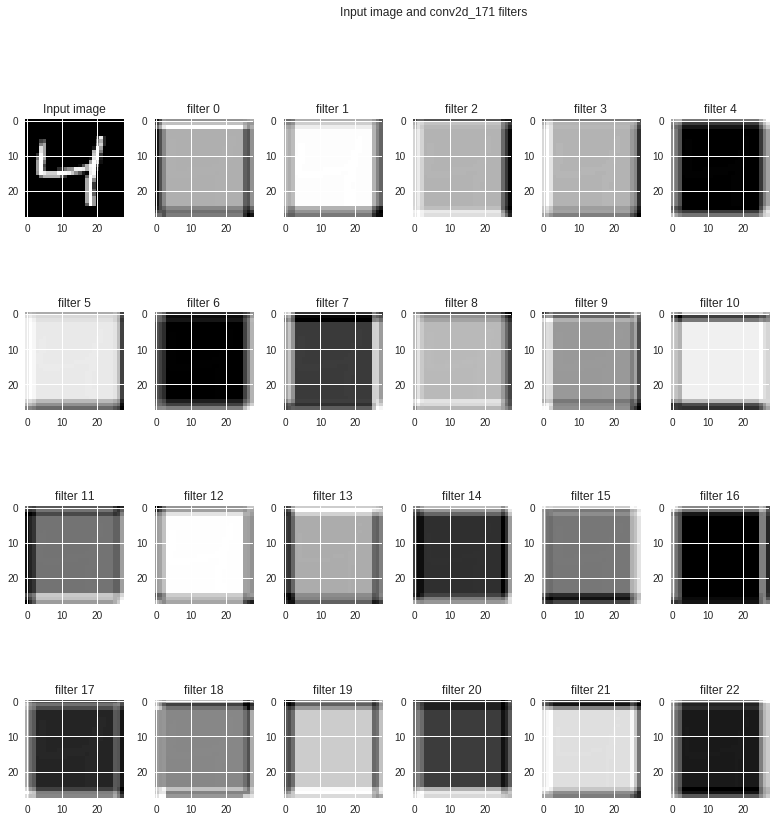

In [76]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_171'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()